In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In numerical computations, it is generally a consensus that polynomials should be represented using a well-conditioned basis, e.g., the Lagrange polynomial basis, an orthogonal polynomial basis, etc. The monomial basis is known to be extremely ill-conditioned, so its use is often considered to be a bad idea. 

In this demo, we compare polynomial interpolation in the monomial basis, and polynomial interpolation in the Lagrange basis (evaluated using the Barycentric interpolation formula), of a function $F:[-1,1] \to \mathbb{R}$, for various orders of approximation $N$. The Chebyshev nodes $\{x_j\}_{j=0,1,\dots,N}$ are used as the collocation points. 

The monomial coefficients of the interpolating polynomial $P_N(x)=\sum_{k=0}^N a_k x^k$ of $F$ are computed by solving the following Vandermonde system

$$\begin{pmatrix} 1 & x_0 & x_0^2 & \cdots & x_0^N \\  1 & x_1 & x_1^2 & \cdots & x_1^N \\ \vdots & \vdots & \vdots & \ddots &\vdots \\ 1 & x_N & x_N^2 & \cdots &x_N^N \\  \end{pmatrix} \begin{pmatrix} a_0 \\  a_1  \\ \vdots  \\ a_N \\ \end{pmatrix}=\begin{pmatrix} F(x_0)\\  F(x_1)  \\ \vdots  \\ F(x_N) \\ \end{pmatrix}.  $$

It is well-known that
the condition number of this Vandermonde matrix grows exponentially fast, from which it follows that the computed monomial coefficients are highly inaccurate.  Let's check how polynomial interpolation in the monomial basis behaves in practice.

First, input any function $F: [-1,1] \to \mathbb{R}$ that you like.

In [ ]:
F = lambda x: np.cos(2*x+1)
# F = lambda x: np.cos(8*x+1)
# F = lambda x: np.abs(x)
# F = lambda x: 1/(x-np.sqrt(2))
# F = lambda x: np.tan(np.power(x, 2))

Then, we run the experiments.

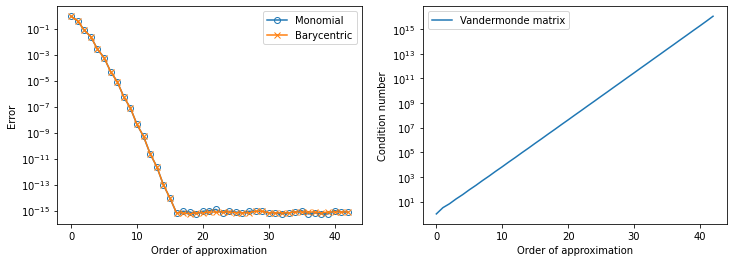

In [ ]:
xx = np.linspace(-1, 1, 10000)
sol = F(xx)

err_mono_lst = []
err_bary_lst = []

vand_cond_lst = []

# The value of N shouldn't be higher than 43 (but you can try it out). See Section 2.2 of our paper [1] for the explanation.
N = 43

for ord in range(N):

  # Construction of collocation points
  npts = ord + 1
  ii = np.arange(0, npts+1, dtype=np.float64)
  cheb_pts = np.flip(np.cos(np.pi*ii/npts))
  f = F(cheb_pts)

  # Polynomial interpolation in the monomial basis
  V = np.vander(cheb_pts, increasing=True)
  a = np.linalg.solve(V, f)
  est_mono = np.polynomial.polynomial.polyval(xx, a)
  err_mono_lst.append(np.linalg.norm(np.abs(est_mono - sol), np.inf))

  vand_cond_lst.append(np.linalg.cond(V))

  # Polynomial interpolation in the Lagrange polynomial basis
  est_bary = interpolate.barycentric_interpolate(cheb_pts, f, xx)
  err_bary_lst.append(np.linalg.norm(np.abs(est_bary - sol), np.inf))

# Visualize the approximation errors, and the condition number of the Vandermonde matrix V
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].semilogy(np.arange(N), err_mono_lst, "o-", fillstyle = 'none')
ax[0].semilogy(np.arange(N), err_bary_lst, "x-")

ax[0].legend(['Monomial', 'Barycentric'])
ax[0].set(xlabel="Order of approximation", ylabel="Error")

ax[1].semilogy(np.arange(N), vand_cond_lst, "-")
ax[1].legend(['Vandermonde matrix'])
ax[1].set(xlabel="Order of approximation", ylabel="Condition number")

plt.show()

According to the experimental results, you may observe that polynomial interpolation in the monomial basis is, surprisingly, as accurate as polynomial interpolation in a more well-conditioned basis in many cases. Additionally, no special algorithms are used in our demo to compute the monomial coefficients.

**What happened?** We show in our recent work [1] that the monomial basis is generally as good as a well-conditioned polynomial basis for interpolation, provided that the condition number of the Vandermonde matrix is smaller than the reciprocal of machine epsilon. 

**Okay. But is this useful?** Yes. The use of the monomial basis for interpolation has its unique merits in a number of applications (see, for example, Section 3 in [1]).

**References**

[1] Zewen Shen and Kirill Serkh. “Is polynomial interpolation in the monomial basis unstable?” (2022). [arxiv](https://arxiv.org/abs/2212.10519)